## Prediction of ETH Price using SBi-LSTM

In [1]:
# PR
# 1. Jelaskan perbedaan antara FeedForward & BackForward pada Neural Network!
# 2. Jelaskan perbedaan Stacked & Bidirectional pada Neural Network!
# 3. Jelaskan pengertian dari metode RNN, LSTM, dan GRU!
# 4. Jelaskan apakah bisa konsep Stacked dan Bidirectional dipadukan dengan Metode LSTM? Mengapa demikian?? 
# 5. Jelaskan apa yang dimaksud dengan Hyperparameter Grid-Search CV

In [2]:
# Library Get Dataset
import yfinance as yf

# Lib Manipulations : Time
import time as tm

# Lib Load Dataset
import numpy as np
import pandas as pd

pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 1000)

# Lib Load Data Visualization
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Lib Load Preprocessing Data
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Lib Load Neural Networks
import tensorflow as tf
from keras.layers import LSTM
from keras.layers import GRU

from tensorflow.python.keras.layers import SimpleRNNCell
from tensorflow.python.keras.layers import RNN
from tensorflow.keras.layers import LSTM, SimpleRNNCell

# Lib Evaluate Models
import scipy.stats as sc
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error # ganti from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [3]:
import sklearn
print(sklearn.__version__)


1.5.2


In [4]:
from sklearn.metrics import mean_squared_error


In [5]:
# Set Random Number
import random as rm
rm.seed(1234)

# Set Random Number
import numpy as np
np.random.seed(1234)

# Set Random Number
import tensorflow as tf
tf.random.set_seed(1234)

### 1. Data Acquisition

In [6]:
# Set Stock Price
ticker = "ETH-USD"

# Get Dataset from yfinance
df = yf.Ticker(ticker).history(start="2015-01-01", end="2024-11-30").reset_index()

# Set Feature OHLC
df = df[["Date", "Open", "High", "Low",	"Close"]]
print(np.round(df,2))

                          Date     Open     High      Low    Close
0    2017-11-09 00:00:00+00:00   308.64   329.45   307.06   320.88
1    2017-11-10 00:00:00+00:00   320.67   324.72   294.54   299.25
2    2017-11-11 00:00:00+00:00   298.59   319.45   298.19   314.68
3    2017-11-12 00:00:00+00:00   314.69   319.15   298.51   307.91
4    2017-11-13 00:00:00+00:00   307.02   328.42   307.02   316.72
...                        ...      ...      ...      ...      ...
2573 2024-11-25 00:00:00+00:00  3364.60  3545.28  3304.09  3413.54
2574 2024-11-26 00:00:00+00:00  3412.95  3461.29  3255.54  3326.52
2575 2024-11-27 00:00:00+00:00  3326.03  3687.01  3303.57  3657.25
2576 2024-11-28 00:00:00+00:00  3656.61  3664.88  3531.87  3579.81
2577 2024-11-29 00:00:00+00:00  3579.91  3647.26  3538.45  3593.49

[2578 rows x 5 columns]


### 2. Exploration Data Analysis (EDA)

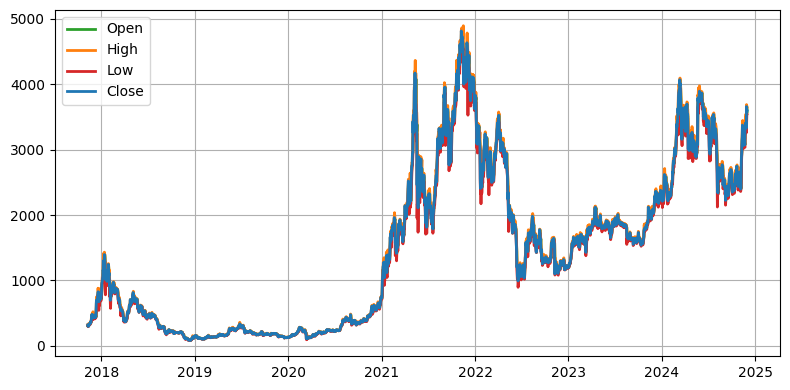

In [7]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(df["Date"], df["Open"], color="tab:green", label="Open", linewidth=2)
ax.plot(df["Date"], df["High"], color="tab:orange", label="High", linewidth=2)
ax.plot(df["Date"], df["Low"], color="tab:red", label="Low", linewidth=2)
ax.plot(df["Date"], df["Close"], color="tab:blue", label="Close", linewidth=2)

ax.xaxis.set_major_formatter(DateFormatter("%Y"))
ax.set_title("", fontsize=12)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
ax.legend(loc="best")
ax.grid(True)


plt.tight_layout()
plt.show()

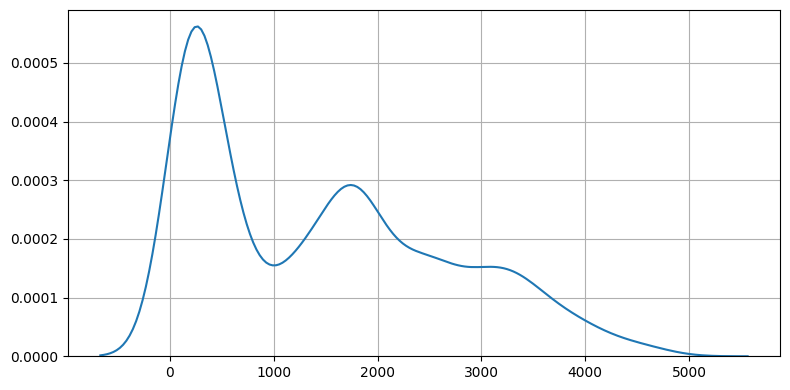

In [8]:
fig, ax = plt.subplots(figsize=(8, 4))

sns.kdeplot(data=df, x='Open', bw_adjust=1)

# ax.xaxis.set_major_formatter(DateFormatter("%Y"))
ax.set_title("", fontsize=12)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
# ax.legend(loc="best")
ax.grid(True)


plt.tight_layout()
plt.show()

### 3. Data Preprocessing

In [9]:
# Choose Feature : Close Price
data = df.filter(["Close"])
data = data.values

In [10]:
# Show Result Feature Selection
np.round(data[:5],6)


array([[320.884003],
       [299.252991],
       [314.681   ],
       [307.90799 ],
       [316.716003]])

In [11]:
# Show Dimension Data
print("Dimension of Dataset : "+str(data.shape))

Dimension of Dataset : (2578, 1)


- Normalization Data with MinMaxScaler

In [12]:
# Normalize Features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(np.array(data).reshape(-1,1))

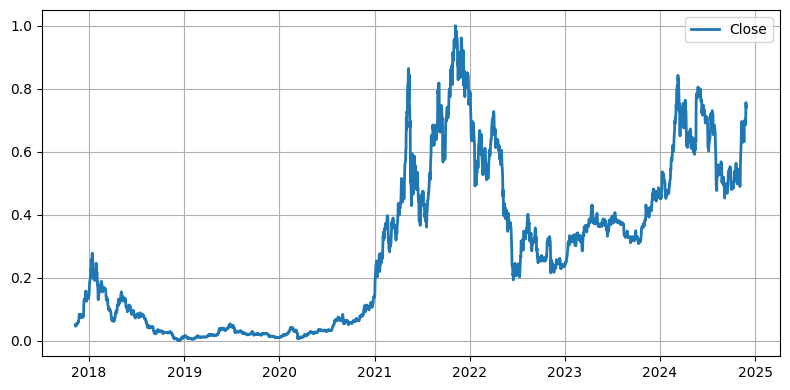

In [13]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(df["Date"], scaled, color="tab:blue", label="Close", linewidth=2)

ax.set_title('')
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend(loc="best")
ax.grid(True)

plt.tight_layout()
plt.show()

### 4. Splitting Data

In [14]:
# Train & Test Data
train_data, test_data = train_test_split(scaled, train_size=0.8, test_size=0.2, shuffle=False)

# Check Result Splitting
print("Dimension of Data Train : "+str(train_data.shape))
print("Dimension of Data Test  : "+str(test_data.shape))

Dimension of Data Train : (2062, 1)
Dimension of Data Test  : (516, 1)


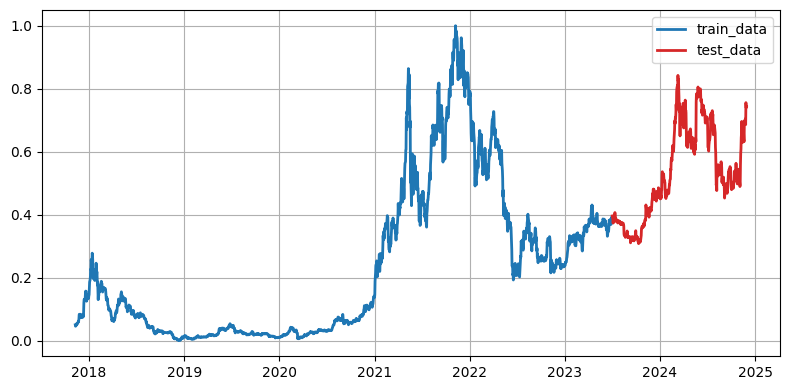

In [15]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(
    df["Date"].iloc[0:len(train_data)], train_data, color="tab:blue", label="train_data", linewidth=2
)
ax.plot(
    df["Date"].iloc[len(train_data):], test_data, color="tab:red", label="test_data", linewidth=2
)

ax.set_title('')
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend(loc="best")
ax.grid(True)

plt.tight_layout()
plt.show()

### 5. Supervised Learning on Time Series

In [16]:
# Function for Supervised Learning
def create_dataset(look_back, dataset):

    # Declare Variable X & Y
    dataX = []
    dataY = []

    # For loop for create supervised learning
    for i in range(look_back, len(dataset)):
        dataX.append(dataset[i-look_back:i, 0])
        dataY.append(dataset[i, 0])

    # Return value X and Y
    return np.array(dataX), np.array(dataY)

In [17]:
# Supervised Learning
x_train, y_train = create_dataset(60, train_data)

# Result of Supervised Learning
print("Dimension of XTrain : "+str(x_train.shape))
print("Dimension of YTrain : "+str(y_train.shape))

Dimension of XTrain : (2002, 60)
Dimension of YTrain : (2002,)


In [18]:
# Supervised Learning
x_test, y_test = create_dataset(60, test_data)

# Result of Supervised Learning
print("Dimension of XTest : "+str(x_test.shape))
print("Dimension of YTest : "+str(y_test.shape))

Dimension of XTest : (456, 60)
Dimension of YTest : (456,)


In [19]:
# Reshape Input to be Sample, Time Step, and Feature
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Result of Input LSTM
print("Dimension of XTrain : "+str(x_train.shape))
print("Dimension of YTrain : "+str(y_train.shape))

# Result of Input LSTM
print("Dimension of XTest  : "+str(x_test.shape))
print("Dimension of YTest  : "+str(y_test.shape))

Dimension of XTrain : (2002, 60, 1)
Dimension of YTrain : (2002,)
Dimension of XTest  : (456, 60, 1)
Dimension of YTest  : (456,)


### 6. Implementation of Neural Network using Tensorflow

In [20]:
# PR : 
# 1. Jelaskan apa yang dimaksud dengan Neural Network
# 2. Jelaskan tentang Input Layer, Hidden Layer, dan Output Layer
# 3. Jelaskan apa yang dimaksud LSTM
# 4. Jelaskan pengaruh setting Optimizer, Batch Size, dan Epoch ke dalam Model LSTM
# 5. Jelaskan perbedaan antara Grid Search, Random Search, dan Bayesian Search untuk setting parameter LSTM

In [21]:
# Measuring Execution Time
start_time = tm.time()

In [22]:
# Set Parameter Tuning
optimizers = "rmsprop"        # PR 6. Jelaskan perbedaan antara adamax, adam, rmsprop, SGD
batch_size = 32              # PR 7. Jelaskan pengaruh jumlah Batch Size 4, 8, 16, 32 ke Model LSTM
epoch      = 25              # PR 8. Jelaskan pengaruh jumlah Epoch 50, 75, 100 ke Model LSTM
# 9. Tentukan parameter untuk membuat prediksi ETH menjadi bagus!


In [23]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Bidirectional, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Custom LSTM Class (Pindahkan build_sbi_lstm_model ke dalam class ini)
class CustomLSTM(tf.keras.Model):
    def __init__(self, input_shape, lstm_units=64, dropout_rate=0.2):
        super(CustomLSTM, self).__init__()

        # Jumlah layer LSTM dan ukuran hidden state
        self.n_layers = 3  # Menggunakan 3 layer LSTM
        self.hidden_dim = lstm_units
        
        # Pertama Bidirectional LSTM layer
        self.lstm1 = Bidirectional(LSTM(units=lstm_units, return_sequences=True, input_shape=input_shape))
        
        # Kedua Bidirectional LSTM layer
        self.lstm2 = Bidirectional(LSTM(units=lstm_units*2, return_sequences=True))
        
        # Ketiga Bidirectional LSTM layer
        self.lstm3 = Bidirectional(LSTM(units=lstm_units*4, return_sequences=False))
        
        # Dropout layer untuk mencegah overfitting
        self.dropout = Dropout(dropout_rate)
        
        # Dense layer dengan 1 unit untuk output prediksi
        self.fc = Dense(1)

    def call(self, x, training=False):
        # Pass input melalui layer LSTM
        x = self.lstm1(x)
        x = self.lstm2(x)
        x = self.lstm3(x)
        
        # Terapkan dropout hanya saat training
        x = self.dropout(x, training=training)
        
        # Output prediksi melalui layer Dense
        x = self.fc(x)
        
        return x

    # Method untuk compile dan ringkasan model
    def compile_and_summary(self, optimizer=optimizers, loss='mean_squared_error'):
        # Compile the model
        self.compile(optimizer=optimizer, loss=loss)
        
        # Print model summary
        self.summary()

# Example Usage for Input Data
def example_usage(x_train):
    # Set input shape for your training data (Assumed x_train is available)
    input_shape = (x_train.shape[1], 1)  # Adjust to match your data

    # Initialize the custom LSTM model
    model = CustomLSTM(input_shape=input_shape, lstm_units=64, dropout_rate=0.2)

    # Example dummy input (Ensure x_train is defined or use placeholder)
    x_dummy = tf.zeros((32, x_train.shape[1], 1))  # Batch size = 32, sequence length = x_train.shape[1]
    model(x_dummy)  # Call to build the model

    # Compile the model with Adam optimizer
    model.compile_and_summary()

    # Return the model
    return model

# Misalnya, x_train sudah didefinisikan sebelumnya
# x_train = np.random.random((100, 10))  # Contoh shape untuk x_train

# Mendapatkan objek model
model = example_usage(x_train)

# Sekarang Anda bisa menggunakan variabel model di luar fungsi
print(model.summary())  # Menampilkan ringkasan model


Model: "custom_lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  multiple                  33792     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  multiple                  263168    
 onal)                                                           
                                                                 
 bidirectional_2 (Bidirecti  multiple                  1050624   
 onal)                                                           
                                                                 
 dropout (Dropout)           multiple                  0         
                                                                 
 dense (Dense)               multiple                  513       
                                                       

In [24]:
# 2. Compile Models
model.compile(optimizer=optimizers, loss="mean_squared_error")

In [25]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

history = model.fit(
    x=x_train, y=y_train,
    batch_size=batch_size, epochs=epoch, verbose=1,
    validation_data=(x_test, y_test),
    shuffle=False, use_multiprocessing=True,
    callbacks=[early_stop, reduce_lr]
)


Epoch 1/25
63/63 [==============================] - 30s 405ms/step - loss: 0.0424 - val_loss: 0.0241 - lr: 0.0010
Epoch 2/25
63/63 [==============================] - 25s 395ms/step - loss: 0.0155 - val_loss: 0.0301 - lr: 0.0010
Epoch 3/25
63/63 [==============================] - 25s 399ms/step - loss: 0.0086 - val_loss: 0.0305 - lr: 0.0010
Epoch 4/25
63/63 [==============================] - 26s 411ms/step - loss: 0.0074 - val_loss: 0.0301 - lr: 0.0010
Epoch 5/25
63/63 [==============================] - 26s 412ms/step - loss: 0.0066 - val_loss: 0.0297 - lr: 0.0010
Epoch 6/25
63/63 [==============================] - 26s 414ms/step - loss: 0.0061 - val_loss: 0.0268 - lr: 0.0010
Epoch 7/25
63/63 [==============================] - 27s 422ms/step - loss: 0.0044 - val_loss: 0.0191 - lr: 5.0000e-04
Epoch 8/25
63/63 [==============================] - 27s 424ms/step - loss: 0.0034 - val_loss: 0.0152 - lr: 5.0000e-04
Epoch 9/25
63/63 [==============================] - 27s 433ms/step - loss: 0.002

In [26]:
# # 3. Fitting Models
# history = model.fit(
#     x=x_train, y=y_train,
#     batch_size=batch_size, epochs=epoch, verbose=1,
#     validation_data=(x_test, y_test),
#     shuffle=False, use_multiprocessing=True,
# )

In [29]:
# 4. Model Predictions
predictions = model.predict(x_test, verbose=0)

In [30]:
# Balikkan normalisasi ke skala asli
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))


In [31]:
# Measuring Execution Time
end_time = tm.time()

# Calculating the Total Execution Time
execution_time = end_time - start_time

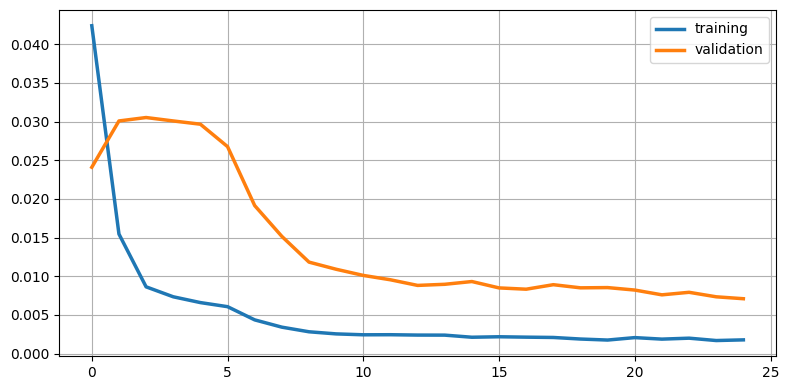

In [32]:
# Create Figure with Matplotlib
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(history.epoch, history.history["loss"], label="training", linewidth=2.5)
ax.plot(history.epoch, history.history["val_loss"], label="validation", linewidth=2.5)

# Set Labels
ax.set_title("", fontsize=12)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
ax.legend(loc="best")
ax.grid(True)

# Return Values
plt.tight_layout()
plt.show()

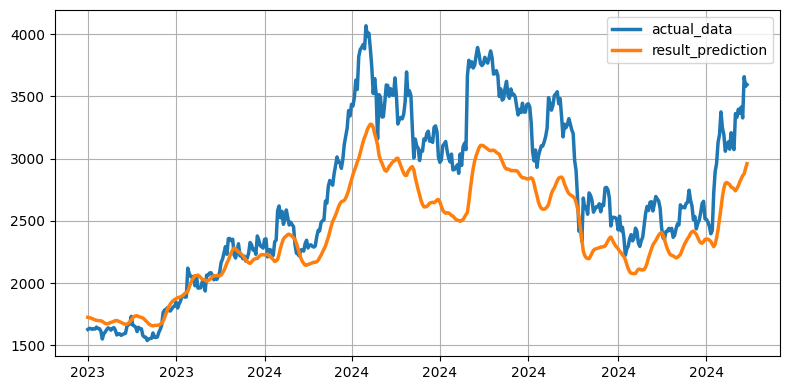

In [33]:
# Create Figure with Matplotlib
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(df[["Date"]].iloc[len(y_train)+120:], y_test,
        label="actual_data", linewidth=2.5)
ax.plot(df[["Date"]].iloc[len(y_train)+120:], predictions,
        label="result_prediction", linewidth=2.5)

# Set Labels
ax.xaxis.set_major_formatter(DateFormatter("%Y"))
ax.set_title("", fontsize=12)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
ax.legend(loc="best")
ax.grid(True)

# Return Values
plt.tight_layout()
plt.show()

### 7. Model Evaluation

In [34]:
# Function
def evaluate_models(ytrue, ypred):

    # Calculate R & MAPE
    r    = sc.mstats.pearsonr(ytrue,ypred)[0]
    mape = mean_absolute_percentage_error(ytrue,ypred)

    # Return Values
    return np.round(r,4), np.round(mape,4)

In [35]:
# Calculate Error
r, mape = evaluate_models(y_test, predictions)
print("r    : "+str(np.round(r, 4)))
print("mape : "+str(np.round(mape, 4)))
print("Time : "+"{:,.2f}".format(execution_time))

# Rentang nilai r dari 0 sampai 1, mendekati 0 artinya modelnya jelek, mendekati 1 berarti bagus
# Sedangkan rentang nilai mape, dari 0% sampai 100%, semakin mendekati 0 artinya modelnya semakin bagus, mendekati 100 artinya semakin jelek

r    : 0.972
mape : 0.1048
Time : 1,222.39
